In [1]:
# NB: per eseguire questo notebook come file Python, scegliere il menù "File -> Download as -> Python (.py)" .
# Da Canopy, scommentando questa istruzione si hanno i grafici nella console e non in finestre aggiuntive:
#get_ipython().magic(u'matplotlib inline')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import gaussian
from stft import *
from hamming import *

In [2]:
first_octave = [16.35, 17.32, 18.35, 19.45, 20.60, 21.83, 23.12, 24.50, 25.96, 27.60, 29.14, 30.87]
notes = ['Do','Do#','Re','Re#','Mi','Fa','Fa#','Sol','Sol#','La','La#','Si']
o = np.zeros((1,12))

def notefinder(freq):
    octave = 0
    for i in range(8):
        if freq < 2**(i+5):
            octave = i
            #print(octave)
            break
    o = [hz*2**octave for hz in first_octave]
    #print(o)
    for i in range(11):
        if freq < o[i]/2+o[i+1]/2:
            #print(o[i])
            return [notes[i],octave]
    return ['Si',octave]

fc =  44100
istart =  46000


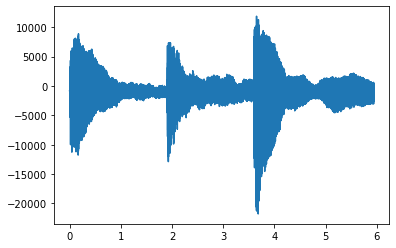

In [3]:
selezione = 2

if selezione==0:
  fc,ytot = wavfile.read('twinkle_twinkle.wav')
  I = np.where(ytot[:,0] >= 10)
  istart = I[0][0] # ci possono essere fino a due secondi di silenzio all'inizio della traccia
  N = 65536*8  # numero di campioni del segnale campionato a 44.1 KHz
  a = 128*16  # passo di traslazione nel tempo
  b = 8  # passo di campionamento in frequenza
elif selezione==1:
  fc,ytot = wavfile.read('intro_KeithJarrett_Country.wav')
  I = np.where(ytot[:,0] >= 10)
  istart = I[0][0] # ci possono essere fino a due secondi di silenzio all'inizio della traccia
  N = 65536*2  # numero di campioni del segnale campionato a 44.1 KHz
  a = 64  # passo di traslazione nel tempo
  b = 8  # passo di campionamento in frequenza
elif selezione==2:
  fc,ytot = wavfile.read('pianoforte_4.wav')  # note "legate"
  istart = 46000
  N = 65536*4  # numero di campioni del segnale campionato a 44.1 KHz
  a = 128*4  # passo di campionamento nel tempo
  b = 32*2  # passo di campionamento in frequenza
elif selezione==3:
  fc,ytot = wavfile.read('pianoforte_3.wav')  # note "staccate"
  istart = 50000
  N = 65536*8  # numero di campioni del segnale campionato a 44.1 KHz
  a = 128*4  # passo di campionamento nel tempo
  b = 32*2  # passo di campionamento in frequenza

print("fc = ", fc); print("istart = ", istart)
y = ytot[istart+np.arange(N),:]
#wavfile.play(y, fc)
y = y[:,0] 
plt.figure(1); plt.plot(np.arange(float(N))/fc, y); plt.show()

In [4]:
nota = 2

if selezione == 3:
    if nota == 1:
        start1 = 50000; N1 = 20000;
    elif nota == 2:
        start1 = 190000; N1 = 20000;
    elif nota == 3:
        start1 = 500000; N1 = 20000;
if selezione == 2:
    if nota == 1:
        start1 = 50000; N1 = 20000;
    elif nota == 2:
        start1 = 125000; N1 = 15000;
    elif nota == 3:
        start1 = 187000; N1 = 17000;

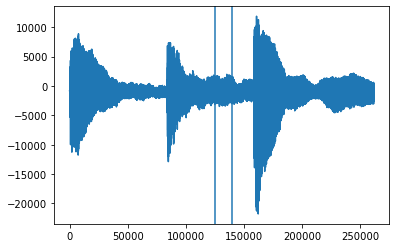

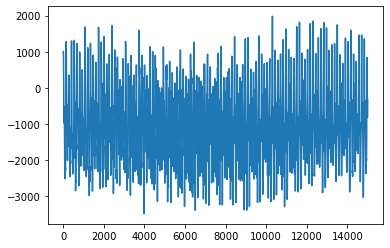

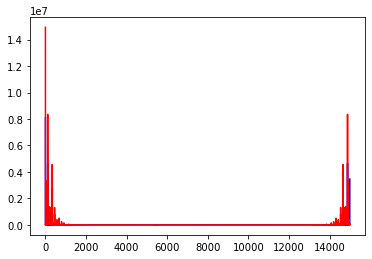

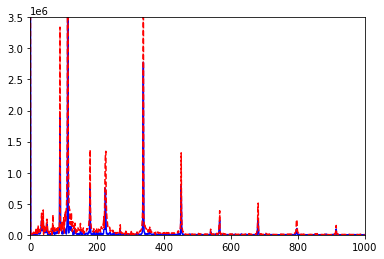

In [5]:
if selezione > 1:
    y1 = y[start1:start1+N1]

    plt.figure(11); plt.axvline(x=start1); plt.axvline(x=start1+N1); plt.plot(y); plt.show()
    #print("df = ",fc/N1, " [Hz]")
    plt.figure(12); plt.plot(y1); plt.show()
    w1 = hamming(N1)                  #creiamo finestra di hamming su una base di N1 punti
    Y1 = fft(y1)                      #fft di questo pezzo di nota
    WY1 = fft(w1 * y1)                #resa 'periodica' tramite windowing
    WIntens = np.abs(WY1)
    plt.figure(13); plt.plot(WIntens,'b-'); plt.plot(np.abs(Y1),'r-'); plt.show()  #in blu la fenestrata, tutta, rappresentata in modulo
    plt.figure(14); plt.axis([0., 1000., 0., 3500000.]); plt.plot(WIntens[0:1000],'b-'); plt.plot(np.abs(Y1[0:1000]),'r--'); plt.show()

In [6]:
if selezione > 1:    #ora dobbiamo determinare la frequenza corrispondente
    nu = WIntens[10:2000].argmax()+10
    f = (nu/N1)*fc
    print('la frequenza è',f,'Hz ossia un',notefinder(f))

la frequenza è 329.28 Hz ossia un ['Mi', 4]


In [7]:
sigma = 512
g = gaussian(N, sigma) # costruzione della gaussiana:
                       # e' una gaussiana di centro c e deviazione standard sigma che e'
                       # calcolata  nei punti [0:N-1];
                       # e' infatti ipotizzato che la sequenza di dati lunga N abbia gli indici
                       # che corrono da 0 a N-1
#plt.figure(21); plt.plot(g); plt.show()

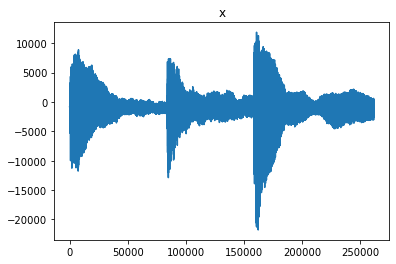

n =  262144
a =  512
n/a =  512.0
b =  64
n/b =  4096.0


<ipython-input-8-140c1f75ec0f>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  res[int(jj+nt/2) % nt][:] = v


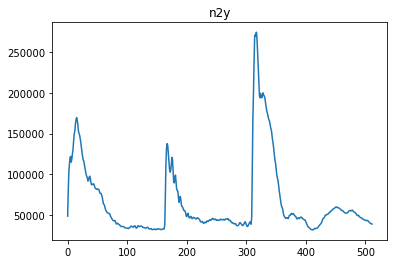

In [8]:
def my_stft(y,g,a,b): #per l'intro non abbiamo segnali stazionari, serve la dtft
    x = y.copy()
    plt.figure(39); plt.plot(x); plt.title('x'); plt.show()
    w = g
    n = len(x)
    print("n = ",n)
    print("a = ",a)
    print("n/a = ",n/a)
    print("b = ",b)
    print("n/b = ",n/b)
    nt = int(n/a)
    res = np.zeros((nt,int(n/b))) 
    w1 = np.concatenate((w, np.zeros(n-len(w)))) 
    #plt.figure(40); plt.plot(w1)
    ww1 = np.concatenate((w1, w1))  
    #plt.figure(42); plt.plot(ww1); plt.title('ww1'); plt.show()
    n2y = np.zeros(nt)
    for jj in range(nt): 
      wf = ww1[ (n - jj*a) : (2*n - jj*a) ]
      y  = x * wf
      n2y[int(jj+nt/2) % nt] = np.linalg.norm(y,2)
      y1 = perbas(y,b)
      v = fft(y1)
      if jj<-1: #era '==0' ma così l'ho disattivato per togliere un po' di grafici dall output
        plt.figure(100+jj); plt.plot(wf); plt.title('wf'); plt.show()
        plt.figure(200+jj); plt.plot(y); plt.title('y'); plt.show()
        plt.figure(300+jj); plt.plot(y1); plt.title('y1'); plt.show()
        plt.figure(400+jj); plt.plot(v); plt.title('v'); plt.show()
      #endif
      res[int(jj+nt/2) % nt][:] = v 
    #endfor
    plt.figure(999); plt.plot(n2y); plt.title('n2y'); plt.show()
    return res.T

C = my_stft(y,g,a,b)

(4096, 512)


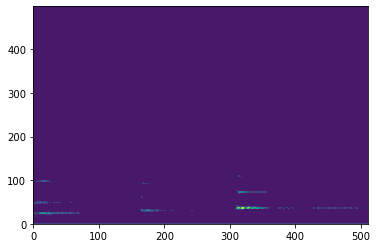

In [9]:
print(C.shape)
plt.figure(2000); plt.contourf(np.array(np.abs(C[0:500,:])))

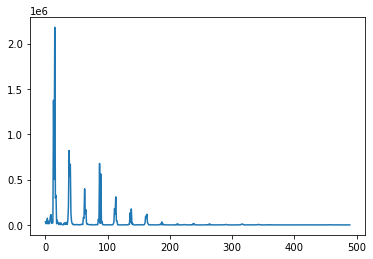

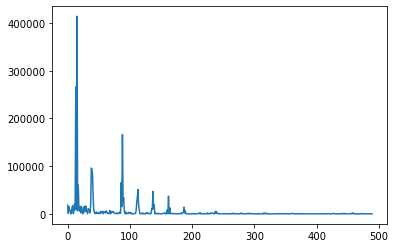

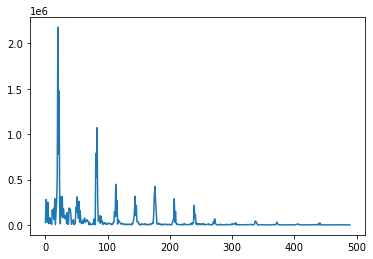

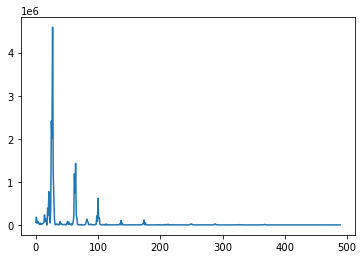

In [10]:
if selezione==1:
    plt.figure(1); plt.plot(abs(C[10:500,100]));  # prima nota
    plt.figure(3); plt.plot(abs(C[10:500,360]))  # seconda nota credo
    plt.figure(4); plt.plot(abs(C[10:500,500]))  # terza nota credo
if selezione==2:
    plt.figure(1); plt.plot(abs(C[10:500,30]))   # prima nota
    plt.figure(2); plt.plot(abs(C[10:500,110]))  # rumore sottofondo prevale
    plt.figure(3); plt.plot(abs(C[10:500,170]))  # seconda nota
    plt.figure(4); plt.plot(abs(C[10:500,330]))  # terza nota
if selezione==3:
    plt.figure(1); plt.plot(abs(C[10:500,10]))   # prima nota
    plt.figure(2); plt.plot(abs(C[10:500,100]))  # rumore sottofondo prevale
    plt.figure(3); plt.plot(abs(C[10:500,162]))  # seconda nota
    plt.figure(4); plt.plot(abs(C[10:500,430]))  # terza nota

In [11]:
nota_prec = 0
durata = 0
spartito = []
C = np.array(np.abs(C))

for time in range(len(C[0,:])):
    nu = C[:,time].argmax()
    if selezione == 0:
        threshold = 6*10**5
    if selezione == 1:
        threshold = 4*10**5
    if selezione == 2:
        threshold = 1*10**6
    if selezione == 3:
        threshold = 1.8*10**5
    if (nu/N)*fc*b < 8000 and (nu/N)*fc*b > 16 and C[nu,time] > threshold:
        nota = notefinder((nu/N)*fc*b)
        #print(nota,time)
        if spartito == []:
            spartito = [[nota,0]]
            last_heard = time
        elif nota == spartito[-1][0] and round((time-last_heard)*a*(1/fc)) < 1: #è ancora la nota precedente
            spartito[-1][1]+=1
        else:
            #print(spartito[-1],C[nu,time])
            spartito = spartito+[[nota,0]]
            last_heard = time

#print(spartito)
if selezione == 0:
    durata_min = 0.05
if selezione == 1:
    durata_min = 0.02
if selezione == 2:
    durata_min = 0.15
if selezione == 3:
    durata_min = 0.2
spartito = [[nota[0],round(nota[1]*a*(1/fc),3)] for nota in spartito]
#print(spartito)
spartito = [nota for nota in spartito if nota[1]>durata_min]
print(spartito)

[[['Do', 4], 0.302], [['Mi', 4], 0.151], [['Sol', 4], 0.29]]
